In [291]:
# -----------------------------------------------------------
# 1. Gerekli kütüphaneleri import etme
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 2. Veri setini yükleme
print("1 & 2. Kütüphane Yükleme ve Veri Setini Okuma...")
# Kullanıcının yüklediği dosyayı kullanıyoruz.
df = pd.read_csv('spotify_songs.csv')

# -----------------------------------------------------------
# 3. Eksik verileri analiz et, median/mode ile doldur, gereksiz sütunları sil.
# -----------------------------------------------------------
print("\n3. Veri Temizliği ve Ön İşleme...")


1 & 2. Kütüphane Yükleme ve Veri Setini Okuma...

3. Veri Temizliği ve Ön İşleme...


In [292]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [293]:
# Eksik verileri olan satırları silme (Çok az sayıda eksik veri olduğu için)
df.dropna(inplace=True)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [295]:
# Çıkarılacak gereksiz sütunlar
columns_to_drop = [
    'track_id',
    'track_name',
    'track_artist',
    'track_album_id',
    'track_album_name',
    'playlist_name',
    'playlist_id',
    'track_album_release_date'
]

# Gereksiz sütunları çıkar
df = df.drop(columns=columns_to_drop)

# Kontrol edelim
print(df.columns)

Index(['track_popularity', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [296]:
df['playlist_genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [297]:
# Kategorik Değişkenleri İşleme: One-Hot Encoding
df = pd.get_dummies(df, columns=['playlist_genre'], drop_first=True)



In [298]:
df['playlist_subgenre'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [299]:
# playlist subgenre sütununda çok fazla kategori olduğu için karmaşıklık yaratacağını öngörerek çıkarma kararı aldım.
df = df.drop(columns=['playlist_subgenre'])


In [300]:
# Hedef değişkeni oluşturma: track_popularity medyanı üzerinden binary sınıflandırma.
popularity_median = df['track_popularity'].median()
df['is_popular'] = df['track_popularity'].apply(lambda x: 1 if x >= popularity_median else 0)

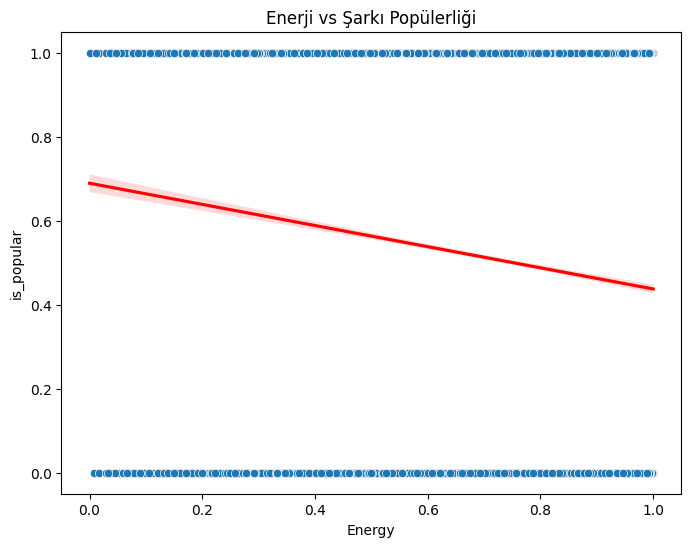

In [301]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='energy', y='is_popular', data=df)
sns.regplot(x='energy', y='is_popular', data=df, scatter=False, color='red')  # trend çizgisi
plt.title("Enerji vs Şarkı Popülerliği")
plt.xlabel("Energy")
plt.ylabel("is_popular")
plt.show()

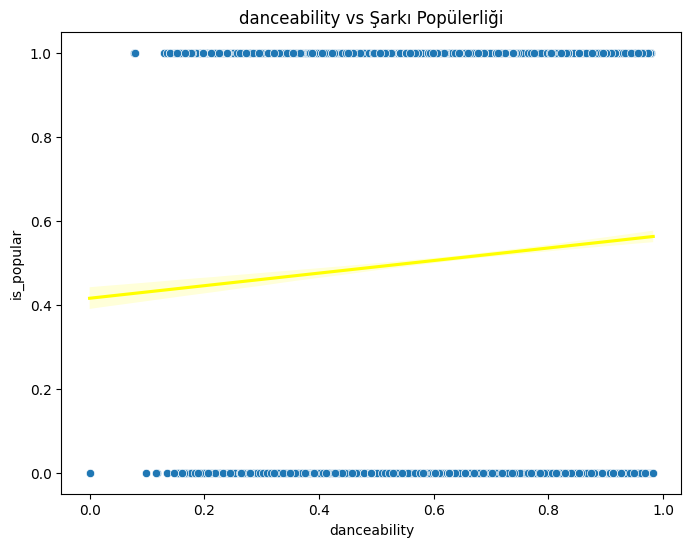

In [302]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='danceability', y='is_popular', data=df)
sns.regplot(x='danceability', y='is_popular', data=df, scatter=False, color='yellow')  # trend çizgisi
plt.title("danceability vs Şarkı Popülerliği")
plt.xlabel("danceability")
plt.ylabel("is_popular")
plt.show()

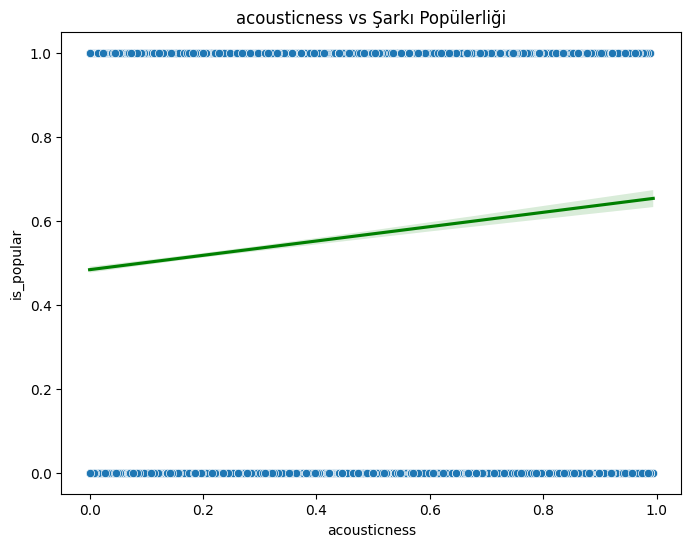

In [303]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='acousticness', y='is_popular', data=df)
sns.regplot(x='acousticness', y='is_popular', data=df, scatter=False, color='green')  # trend çizgisi
plt.title("acousticness vs Şarkı Popülerliği")
plt.xlabel("acousticness")
plt.ylabel("is_popular")
plt.show()

In [304]:
# Feature engineering aşamasında yeni değişkenler oluştur.
# -----------------------------------------------------------
print("\n5. Özellik Mühendisliği (Feature Engineering)...")

# 5.1. Yeni Değişken Oluşturma: Süreyi milisaniyeden dakikaya çevirme
df['duration_min'] = df['duration_ms'] / 60000
df.drop('duration_ms', axis=1, inplace=True)



5. Özellik Mühendisliği (Feature Engineering)...


In [305]:
# Hedef ve Özellik Matrislerini Tanımlama
# Özellikler ve hedef değişken
X = df.drop('is_popular', axis=1) # Bağımsız değişkenler
y = df['is_popular']                  # Bağımlı değişken

# Veriyi train ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # %20 test, %80 train
    random_state=42  # Tekrar üretilebilirlik için sabit sayı
)

print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
        track_popularity  danceability  energy  key  loudness  mode  \
21563                81         0.664   0.831    2    -4.472     0   
30187                29         0.720   0.560    8    -8.928     1   
6580                 60         0.795   0.779   11    -5.413     1   
20908                32         0.726   0.952    8    -1.483     0   
20150                 0         0.834   0.934    2    -2.898     1   
...                 ...           ...     ...  ...       ...   ...   
16853                35         0.622   0.474    3   -10.243     1   
6265                 57         0.815   0.624    6    -6.096     0   
11287                46         0.308   0.996   10    -3.356     0   
860                  31         0.589   0.592    7    -7.887     0   
15798                25         0.511   0.756   11    -5.258     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
21563       0.0435       0.11100          0.000001    0.0596    0.696   
301

In [306]:
# standard scaler ile ölçeklendirme
scaler = StandardScaler()

# Train seti fit ve transform
X_train_scaled = scaler.fit_transform(X_train)

# Test seti sadece transform (train’den öğrenilen istatistikleri kullan)
X_test_scaled = scaler.transform(X_test)

In [307]:
# logistic regression modeli
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Skoru:", accuracy)


Doğruluk Skoru: 1.0


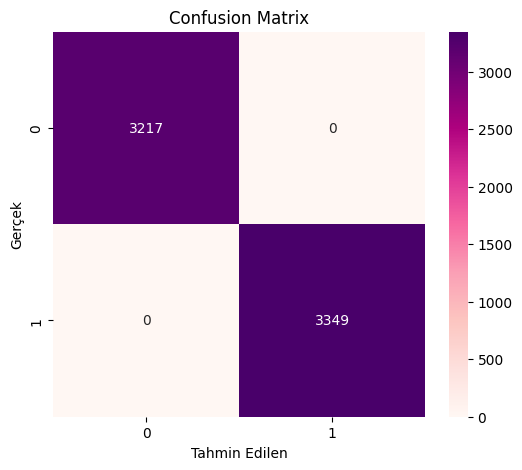

In [308]:
# -----------------------------------------------------------
# 9. Confusion matrix görselini oluştur.
# -----------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()